In [1]:
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import LinearRegression
from datetime import datetime
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

c:\Users\sarik.LAPTOP-F3K7QQN1\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


 TraCI script that starts the simulation and perhaps modifies one simple aspect of the traffic management system, like changing traffic light phases at fixed intervals

In [4]:
import traci

def run_simulation():
    traci.start(['sumo-gui', '-c', 'simulation.cfg'])
    
    step_count = 0  # Initialize a counter for simulation steps
    while traci.simulation.getMinExpectedNumber() > 0 and step_count < 500:
        traci.simulationStep()
        if traci.simulation.getTime() % 60 == 0:  # Every minute, change the phase
            traci.trafficlight.setPhase("299968469", 0)  # Set the traffic light ID = "299968469" to phase 0
        step_count += 1  # Increment the counter each simulation step
    
    traci.close()

run_simulation()

Adding a Simple aspect of the Proposed Algorithm

1)  Simple decision logic: alternate phases every 30 seconds
2) Iteration to traffic volume

In [12]:
import traci

def decide_traffic_light_phase(current_time, traffic_volume, threshold):
    # Advanced logic based on time and current traffic volume
    if current_time % 30 == 0:  # Check every 30 seconds
        if traffic_volume > threshold:
            return 1  # More traffic, longer green phase
        else:
            return 0  # Less traffic, shorter green phase
    return traci.trafficlight.getPhase("299968469")  # Return current phase otherwise

def run_simulation():
    traci.start(['sumo-gui', '-c', 'simulation.cfg.'])
    
    threshold = 15  # Define a threshold for traffic volume that triggers a phase change

    while traci.simulation.getMinExpectedNumber() > 0:
        traci.simulationStep()
        current_time = traci.simulation.getTime()
        traffic_volume = traci.vehicle.getIDCount()  # Get current number of vehicles
        phase = decide_traffic_light_phase(current_time, traffic_volume, threshold)
        traci.trafficlight.setPhase("299968469", phase)  # Update traffic light phase
    
    traci.close()

run_simulation()

Using TraCI’s capabilities to collect and report various metrics like total number of stops, average speed, and cumulative delay for Traffic Light ID =299968469

In [13]:
import traci

def run_simulation():
    traci.start(['sumo-gui', '-c', 'simulation.cfg'])
    
    traffic_light_id = "299968469"
    total_stops = 0
    cumulative_speed = 0
    cumulative_delay = 0
    vehicle_count = 0
    
    while traci.simulation.getMinExpectedNumber() > 0:
        traci.simulationStep()
        
        # Get list of lanes controlled by the specific traffic light
        controlled_lanes = traci.trafficlight.getControlledLanes(traffic_light_id)
        controlled_vehicles = set()

        # Aggregate vehicles from controlled lanes
        for lane in controlled_lanes:
            controlled_vehicles.update(traci.lane.getLastStepVehicleIDs(lane))
        
        for vid in controlled_vehicles:
            speed = traci.vehicle.getSpeed(vid)
            cumulative_speed += speed
            
            # Check if the vehicle is stopped (speed less than a small threshold)
            if speed < 0.1:  # Considered as 'stopped'
                total_stops += 1
            
            # Calculate delay
            max_speed = traci.vehicle.getMaxSpeed(vid)
            delay = max_speed - speed if speed < max_speed else 0
            cumulative_delay += delay
        
        vehicle_count += len(controlled_vehicles)
    
    # Compute averages
    average_speed = cumulative_speed / vehicle_count if vehicle_count > 0 else 0
    average_delay = cumulative_delay / vehicle_count if vehicle_count > 0 else 0
    
    traci.close()
    
    # Print collected metrics
    print(f"Metrics for Traffic Light {traffic_light_id}:")
    print("Total number of stops:", total_stops)
    print("Average speed (m/s):", average_speed)
    print("Average delay (s):", average_delay)

run_simulation()


Metrics for Traffic Light 299968469:
Total number of stops: 24
Average speed (m/s): 3.361303700862971
Average delay (s): 52.19425185469259


Monitoring Changes in the traffic light phase at traffic_light_id = "29299968469"

In [2]:
import traci

def run_simulation():
    traci.start(['sumo-gui', '-c', 'simulation.cfg'])
    
    traffic_light_id = "299968469"  # Replace with your specific traffic light ID
    last_phase_change_time = 0
    current_phase = traci.trafficlight.getPhase(traffic_light_id)
    
    step_counter = 0  # Initialize step counter
    
    # Continue the loop until there are vehicles and the counter is less than 500
    while traci.simulation.getMinExpectedNumber() > 0 and step_counter < 500:
        traci.simulationStep()
        step_counter += 1  # Increment the step counter

        new_phase = traci.trafficlight.getPhase(traffic_light_id)
        
        if new_phase != current_phase:
            current_time = traci.simulation.getTime() / 1000  # Convert milliseconds to seconds
            time_since_last_change = current_time - last_phase_change_time
            last_phase_change_time = current_time
            current_phase = new_phase

            print(f"Phase changed to {new_phase} at {current_time}s, {time_since_last_change}s since last change.")
            
            # Check if the phase change interval is as expected (e.g., every 30 seconds)
            if not (29.5 < time_since_last_change < 30.5):
                print(f"Warning: Unexpected phase change interval of {time_since_last_change}s at {current_time}s")
    
    traci.close()

run_simulation()

Phase changed to 1 at 0.083s, 0.083s since last change.
Phase changed to 2 at 0.086s, 0.002999999999999989s since last change.
Phase changed to 0 at 0.091s, 0.0050000000000000044s since last change.
Phase changed to 1 at 0.173s, 0.08199999999999999s since last change.
Phase changed to 2 at 0.176s, 0.0030000000000000027s since last change.
Phase changed to 0 at 0.181s, 0.0050000000000000044s since last change.
Phase changed to 1 at 0.263s, 0.08200000000000002s since last change.
Phase changed to 2 at 0.266s, 0.0030000000000000027s since last change.
Phase changed to 0 at 0.271s, 0.0050000000000000044s since last change.
Phase changed to 1 at 0.353s, 0.08199999999999996s since last change.
Phase changed to 2 at 0.356s, 0.0030000000000000027s since last change.
Phase changed to 0 at 0.361s, 0.0050000000000000044s since last change.
Phase changed to 1 at 0.443s, 0.08200000000000002s since last change.
Phase changed to 2 at 0.446s, 0.0030000000000000027s since last change.
Phase changed to 

Debugging the Traffic light tpo monitor correctly

In [9]:
from xml.etree import ElementTree as ET

def adjust_traffic_light_phases(net_file, min_main_duration=30.0, max_transition_duration=5.0):
    # Load the .net.xml file
    tree = ET.parse(net_file)
    root = tree.getroot()

    # Iterate through all traffic light (tlLogic) elements
    for tlLogic in root.findall('tlLogic'):
        for phase in tlLogic.findall('phase'):
            old_duration = phase.get('duration')
            duration = float(old_duration)
            state = phase.get('state')
            if 'y' in state:
                if duration > max_transition_duration:
                    phase.set('duration', str(max_transition_duration))
                    print(f"Changed transition phase from {old_duration}s to {max_transition_duration}s")
            else:
                if duration < min_main_duration:
                    phase.set('duration', str(min_main_duration))
                    print(f"Changed main phase from {old_duration}s to {min_main_duration}s")

    # Write the modified tree back to the file
    tree.write(net_file)

# Example usage
adjust_traffic_light_phases('kamppi.net copy.xml')


Traffic Light Phase Duration

In [15]:
from xml.etree import ElementTree as ET

def adjust_traffic_light_phases(net_file, min_main_duration=30.0, max_transition_duration=5.0):
    # Load the .net.xml file
    tree = ET.parse(net_file)
    root = tree.getroot()

    # Iterate through all traffic light (tlLogic) elements
    for tlLogic in root.findall('tlLogic'):
        for phase in tlLogic.findall('phase'):
            old_duration = phase.get('duration')
            duration = float(old_duration)
            state = phase.get('state')
            # Print original state and duration
            print(f"Original Phase: {state} with duration: {old_duration}")
            if 'y' in state or 'yyyy' in state:
                if duration > max_transition_duration:
                    phase.set('duration', str(max_transition_duration))
                    print(f"Adjusted Transition Phase: {state} to duration: {max_transition_duration}")
            else: # It's a main phase
                if duration < min_main_duration:
                    phase.set('duration', str(min_main_duration))
                    print(f"Adjusted Main Phase: {state} to duration: {min_main_duration}")

    # Write the modified tree back to the file
    tree.write(net_file)

# Example usage
adjust_traffic_light_phases('kamppi.net copy.xml')


Original Phase: Gr with duration: 42
Original Phase: yr with duration: 3
Original Phase: rG with duration: 42
Original Phase: ry with duration: 3
Original Phase: G with duration: 82
Original Phase: y with duration: 3
Original Phase: r with duration: 30.0
Original Phase: G with duration: 82
Original Phase: y with duration: 3
Original Phase: r with duration: 30.0
Original Phase: GGrrrG with duration: 30.0
Original Phase: yGrrry with duration: 3
Original Phase: rGGGrr with duration: 30.0
Original Phase: ryyyrr with duration: 3
Original Phase: rrrrGG with duration: 30.0
Original Phase: rrrryG with duration: 3
Original Phase: rrrrGggGGg with duration: 42
Original Phase: rrrryyyyyy with duration: 3
Original Phase: GGGGrrrrrr with duration: 42
Original Phase: yyyyrrrrrr with duration: 3
Original Phase: GGGrrr with duration: 42
Original Phase: yyyrrr with duration: 3
Original Phase: rrrGGG with duration: 42
Original Phase: rrryyy with duration: 3
Original Phase: GG with duration: 82
Original P

Analysing data collected from the induction loops

For Detector Output_1

In [24]:
import pandas as pd
import xml.etree.ElementTree as ET

def parse_detector_data(file):
    tree = ET.parse(file)
    root = tree.getroot()
    
    data = []
    for interval in root.findall('.//interval'):
        data.append({
            'Begin': float(interval.get('begin')),
            'End': float(interval.get('end')),
            'Flow': float(interval.get('flow')),
            'Occupancy': float(interval.get('occupancy')),
            'Speed': float(interval.get('speed')),
            'Harmonic Mean Speed': float(interval.get('harmonicMeanSpeed')),
            'nVehEntered': int(interval.get('nVehEntered'))
        })
    
    return pd.DataFrame(data)

# Example use
detector_out1 = parse_detector_data('detectorOutput1.xml')

             Flow     Speed   Occupancy
count    9.000000  9.000000    9.000000
mean    53.333333  0.702222   62.986667
std     63.245553  2.510706   39.271967
min      0.000000 -1.000000    0.000000
25%      0.000000 -1.000000   46.300000
50%     60.000000  0.020000   72.850000
75%     60.000000  0.250000  100.000000
max    180.000000  5.850000  100.000000


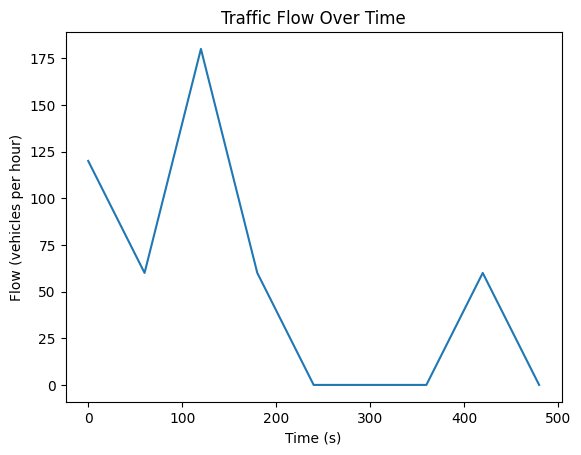

In [25]:
# Summary statistics for flow and speed
summary_stats = detector_out1[['Flow', 'Speed', 'Occupancy']].describe()
print(summary_stats)

# Analyze flow changes over time
import matplotlib.pyplot as plt
plt.plot(detector_out1['Begin'], detector_out1['Flow'])
plt.title('Traffic Flow Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Flow (vehicles per hour)')
plt.show()

For Detector Output_2

In [26]:
import pandas as pd
import xml.etree.ElementTree as ET

def parse_detector_data(file):
    tree = ET.parse(file)
    root = tree.getroot()
    
    data = []
    for interval in root.findall('.//interval'):
        data.append({
            'Begin': float(interval.get('begin')),
            'End': float(interval.get('end')),
            'Flow': float(interval.get('flow')),
            'Occupancy': float(interval.get('occupancy')),
            'Speed': float(interval.get('speed')),
            'Harmonic Mean Speed': float(interval.get('harmonicMeanSpeed')),
            'nVehEntered': int(interval.get('nVehEntered'))
        })
    
    return pd.DataFrame(data)

# Example use
detector_out2 = parse_detector_data('detectorOutput2.xml')

             Flow     Speed  Occupancy
count    9.000000  9.000000   9.000000
mean    73.333333  0.583333  10.787778
std    155.241747  2.554662  18.410417
min      0.000000 -1.000000   0.000000
25%      0.000000 -1.000000   0.000000
50%      0.000000 -1.000000   0.000000
75%     60.000000  0.260000  11.840000
max    480.000000  5.900000  50.480000


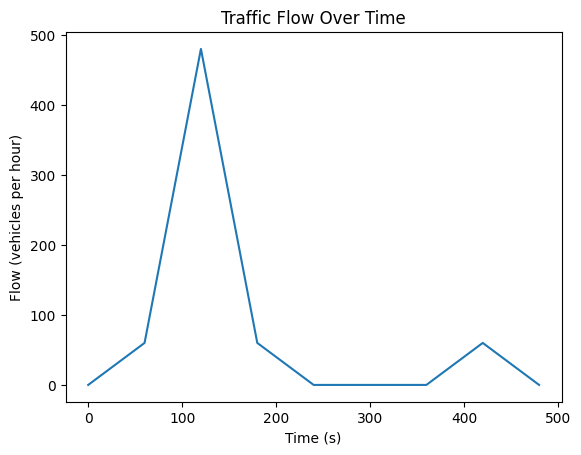

In [27]:
# Summary statistics for flow and speed
summary_stats = detector_out2[['Flow', 'Speed', 'Occupancy']].describe()
print(summary_stats)

# Analyze flow changes over time
import matplotlib.pyplot as plt
plt.plot(detector_out2['Begin'], detector_out2['Flow'])
plt.title('Traffic Flow Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Flow (vehicles per hour)')
plt.show()

Getting Traffic Control Data

In [20]:
import traci

def run_simulation():
    sumoCmd = ['sumo', '-c', 'simulation.cfg']  # Use only sumo instead of sumo-gui for faster computation
    traci.start(sumoCmd)
    
    # Initialize data collection variables
    cumulative_delay = 0
    vehicle_count = 0
    halted_vehicles = set()
    travel_times = {}
    queue_lengths = []

    step = 0
    while step <= 500:  # Limiting simulation steps to 1000 simulation steps
        traci.simulationStep()
        vehicles = traci.inductionloop.getLastStepVehicleIDs("loop1")
        vehicle_count += len(vehicles)

        current_halted_vehicles = set()
        for veh_id in traci.vehicle.getIDList():
            speed = traci.vehicle.getSpeed(veh_id)
            if speed < 0.1:
                if veh_id not in halted_vehicles:
                    halted_vehicles.add(veh_id)
                    delay_increment = traci.simulation.getDeltaT() / 1000  # calculate delay increment in seconds
                    cumulative_delay += delay_increment
                    print(f"Vehicle {veh_id} halted; incrementing delay by {delay_increment}s; cumulative delay now {cumulative_delay}s")

                # Collect halted vehicles for queue length calculation
                if traci.vehicle.getRoadID(veh_id) == "3228733111":
                    current_halted_vehicles.add(veh_id)

            if veh_id in travel_times and speed > 0.1:
                if veh_id in halted_vehicles:
                    halted_vehicles.remove(veh_id)
                travel_times[veh_id] = traci.simulation.getTime() - travel_times[veh_id]

            if veh_id not in travel_times:
                travel_times[veh_id] = traci.simulation.getTime()

        queue_length = len(current_halted_vehicles)
        queue_lengths.append(queue_length)
        print(f"Current queue length at intersection 3228733111: {queue_length} vehicles")

        step += 1

    traci.close()

    average_delay = cumulative_delay / len(halted_vehicles) if halted_vehicles else 0
    average_queue_length = sum(queue_lengths) / len(queue_lengths) if queue_lengths else 0
    average_travel_time = sum(travel_times.values()) / len(travel_times) if travel_times else 0

    # Output results directly to the notebook
    print(f"Vehicle Throughput: {vehicle_count} vehicles")
    print(f"Average Delay: {average_delay} seconds")
    print(f"Average Queue Length: {average_queue_length} vehicles")
    print(f"Average Travel Time: {average_travel_time} seconds")

# Run the simulation function
run_simulation()

Vehicle 0 halted; incrementing delay by 0.001s; cumulative delay now 0.001s
Current queue length at intersection 3228733111: 0 vehicles
Vehicle 1 halted; incrementing delay by 0.001s; cumulative delay now 0.002s
Current queue length at intersection 3228733111: 0 vehicles
Vehicle 2 halted; incrementing delay by 0.001s; cumulative delay now 0.003s
Current queue length at intersection 3228733111: 0 vehicles
Vehicle 3 halted; incrementing delay by 0.001s; cumulative delay now 0.004s
Current queue length at intersection 3228733111: 0 vehicles
Vehicle 4 halted; incrementing delay by 0.001s; cumulative delay now 0.005s
Current queue length at intersection 3228733111: 0 vehicles
Vehicle 5 halted; incrementing delay by 0.001s; cumulative delay now 0.006s
Current queue length at intersection 3228733111: 0 vehicles
Vehicle 6 halted; incrementing delay by 0.001s; cumulative delay now 0.007s
Current queue length at intersection 3228733111: 0 vehicles
Vehicle 7 halted; incrementing delay by 0.001s; 

Data Collection via Traci  to check halted vehicles

In [28]:
def run_simulation():
    sumoCmd = ['sumo', '-c', 'simulation.cfg']  # Use 'sumo-gui' if you want GUI
    traci.start(sumoCmd)
    
    step = 0
    while step < 500:  # Run for 500 simulation steps or until the simulation is over
        traci.simulationStep()
        if step % 10 == 0:  # Collect data every 10 steps
            halted_count, waiting_time = collect_traffic_data("3228733111")
            print(f"Step {step}: {halted_count} halted vehicles, Total waiting time: {waiting_time}")
        step += 1
    
    traci.close()

# Now, define the data collection function
def collect_traffic_data(intersection_id):
    halted_vehicle_count = 0
    cumulative_waiting_time = 0
    vehicles = traci.vehicle.getIDList()
    for veh_id in vehicles:
        if traci.vehicle.getRoadID(veh_id) == intersection_id and traci.vehicle.getSpeed(veh_id) < 0.1:
            halted_vehicle_count += 1
            cumulative_waiting_time += traci.vehicle.getAccumulatedWaitingTime(veh_id)
    return halted_vehicle_count, cumulative_waiting_time

# Finally, run your simulation
run_simulation()

Step 0: 0 halted vehicles, Total waiting time: 0
Step 10: 0 halted vehicles, Total waiting time: 0
Step 20: 0 halted vehicles, Total waiting time: 0
Step 30: 0 halted vehicles, Total waiting time: 0
Step 40: 0 halted vehicles, Total waiting time: 0
Step 50: 0 halted vehicles, Total waiting time: 0
Step 60: 0 halted vehicles, Total waiting time: 0
Step 70: 0 halted vehicles, Total waiting time: 0
Step 80: 0 halted vehicles, Total waiting time: 0
Step 90: 0 halted vehicles, Total waiting time: 0
Step 100: 0 halted vehicles, Total waiting time: 0
Step 110: 0 halted vehicles, Total waiting time: 0
Step 120: 0 halted vehicles, Total waiting time: 0
Step 130: 0 halted vehicles, Total waiting time: 0
Step 140: 0 halted vehicles, Total waiting time: 0
Step 150: 0 halted vehicles, Total waiting time: 0
Step 160: 0 halted vehicles, Total waiting time: 0
Step 170: 0 halted vehicles, Total waiting time: 0
Step 180: 0 halted vehicles, Total waiting time: 0
Step 190: 0 halted vehicles, Total waiting

Simulation Scenarios

Function to Increase Traffic Density

The Function below is used to create peak hour traffic and off peak hour traffic to further analysis

In [42]:
import xml.etree.ElementTree as ET

def clone_element(elem):
    """ Clones an element, including its children """
    new_elem = ET.Element(elem.tag, attrib=elem.attrib)
    for child in elem:
        new_child = clone_element(child)
        new_elem.append(new_child)
    return new_elem

def adjust_traffic_density(input_file, output_file, peak=True):
    tree = ET.parse(input_file)
    root = tree.getroot()

    interval = 0.1 if peak else 2.0  # shorter intervals for peak times
    last_depart = 0.0
    vehicle_id_counter = 0  # Counter to ensure unique vehicle IDs

    vehicles_to_add = []

    for vehicle in list(root):
        vehicle.set("depart", f"{last_depart:.2f}")
        vehicle.set("id", str(vehicle_id_counter))  # Set unique ID
        vehicle_id_counter += 1
        last_depart += interval
        
        if peak:  # Duplicate entries for peak hours
            clone = clone_element(vehicle)
            last_depart += interval
            clone.set("depart", f"{last_depart:.2f}")
            clone.set("id", str(vehicle_id_counter))  # Ensure cloned vehicle has a unique ID
            vehicle_id_counter += 1
            vehicles_to_add.append(clone)

    # Append cloned vehicles after iterating through original list
    root.extend(vehicles_to_add)

    # Sort all vehicles by their departure time before writing to file
    sorted_vehicles = sorted(root, key=lambda v: float(v.get("depart")))
    root[:] = sorted_vehicles  # Replace the children of root with sorted vehicles

    tree.write(output_file)

# Usage
adjust_traffic_density("kamppi.rou.xml", "peak.rou.xml", peak=True)
adjust_traffic_density("kamppi.rou.xml", "offpeak.rou.xml", peak=False)

Function to create Weekend Traffic

In [43]:
import xml.etree.ElementTree as ET

def adjust_depart_times(xml_file, output_file, interval=300):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    current_time = 0.0
    for vehicle in root.findall('vehicle'):
        vehicle.set('depart', f"{current_time:.2f}")
        current_time += interval  # Increment the depart time by interval seconds
    
    tree.write(output_file)

# Adjust depart times for weekend traffic
adjust_depart_times("kamppi.rou.xml", "weekend.rou.xml", interval=300)


Debugging weekend_simulation.cfg

In [44]:
import traci

def simple_run_simulation(sumo_config):
    try:
        traci.start(['sumo', '-c', sumo_config])
        step = 0
        while traci.simulation.getMinExpectedNumber() > 0 and step < 1000:
            traci.simulationStep()
            step += 1
        print("Completed basic simulation steps without error.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        traci.close()

simple_run_simulation('weekend_simulation.cfg')

Completed basic simulation steps without error.


Sumo Traffic Simulation Using dynamically controlled traffic light by TraCI python API

In [45]:
import traci
import os

def run_simulation(sumo_config):
    try:
        # Determine the sumo binary based on environment variable
        sumo_binary = "sumo-gui" if os.getenv("SUMO_GUI") == "1" else "sumo"
        sumo_cmd = [sumo_binary, '-c', sumo_config]

        # Start SUMO with the given configuration file
        traci.start(sumo_cmd)

        max_time = 300  # Maximum time to run the simulation in seconds

        while traci.simulation.getMinExpectedNumber() > 0:
            traci.simulationStep()
            current_time = traci.simulation.getTime()
            if current_time >= max_time:  # Stop simulation after 300 seconds
                break  # Exit the simulation loop when time exceeds the limit

            # Traffic light control logic based on time
            if current_time < 3600:  # Peak time logic
                traci.trafficlight.setPhase("3228733111", 0)
            elif current_time < 7200:  # Off-peak logic
                traci.trafficlight.setPhase("3228733111", 1)
            else:  # Weekend logic
                traci.trafficlight.setPhase("3228733111", 2)

    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        traci.close()  # Ensure that TraCI closes properly after each run

# Define your scenarios
scenarios = {
    "Peak Times": "peak_simulation.cfg",
    "Off Peak Times": "off_peak_simulation.cfg",
    "Weekend": "weekend_simulation.cfg"
}

# Run each scenario
for scenario_name, config_file in scenarios.items():
    print(f"Running scenario: {scenario_name}")
    run_simulation(config_file)

Running scenario: Peak Times
Running scenario: Off Peak Times
Running scenario: Weekend


Data Analysis

Plotting for Peak Simulation

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the trip information from the tripinfo.xml file
# Adjust the XPath based on your XML structure and ensure namespaces are correctly handled if they exist.
trip_info = pd.read_xml('tripinfo_peak.xml', xpath='//tripinfo')

# Check the first few rows to understand the data
print(trip_info.head())

    id  depart    departLane  departPos  departSpeed  departDelay  arrival  \
0    6     1.0    62212960_0        5.1          0.0          0.4     37.0   
1  240    36.0    62212737_0        5.1          0.0         12.0     40.0   
2  241    39.0    62212737_0        5.1          0.0         14.8     43.0   
3  282    29.0  -333061568_0        5.1          0.0          0.8     43.0   
4   72    10.0  28408345#1_0        5.1          0.0          2.8     47.0   

    arrivalLane  arrivalPos  arrivalSpeed  ...  waitingTime  waitingCount  \
0  -234000028_0       53.91          6.59  ...          0.0             0   
1    62212737_0       20.25          7.89  ...          0.0             0   
2    62212737_0       20.25          7.17  ...          0.0             0   
3  -333061564_0       27.90          8.67  ...          0.0             0   
4    62212960_0       27.05          7.61  ...          0.0             0   

   stopTime  timeLoss  rerouteNo                     devices        

In [125]:
# Convert durations from strings to numeric values if not automatically converted
trip_info['duration'] = pd.to_numeric(trip_info['duration'], errors='coerce')

In [126]:
# Basic statistics
print(trip_info['duration'].describe())

count     13.000000
mean      52.461538
std       54.506292
min        4.000000
25%       11.000000
50%       36.000000
75%       99.000000
max      172.000000
Name: duration, dtype: float64


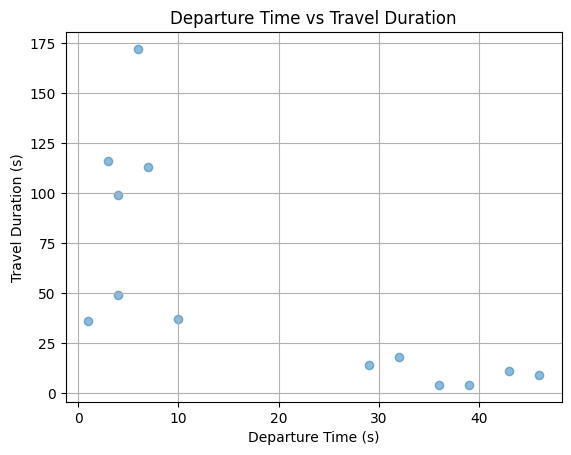

In [49]:
# Plot a scatter plot of start times vs duration to see if there is a pattern
plt.scatter(trip_info['depart'], trip_info['duration'], alpha=0.5)
plt.title('Departure Time vs Travel Duration')
plt.xlabel('Departure Time (s)')
plt.ylabel('Travel Duration (s)')
plt.grid(True)
plt.show()

Plotting for Off-Peak Simulation

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the trip information from the tripinfo.xml file for off-peak simulations
# You may need to adjust the XPath based on your XML structure, and handle namespaces if present.
trip_info_offpeak = pd.read_xml('tripinfo_offpeak.xml', xpath='//tripinfo')

# Check the first few rows to understand the data structure
print(trip_info_offpeak.head())

   id  depart    departLane  departPos  departSpeed  departDelay  arrival  \
0   3     6.0    62212960_0        5.1          0.0          0.0     34.0   
1   7    14.0  30568275#2_0        5.1          0.0          0.0     44.0   
2   0     0.0  30568275#2_0        5.1          0.0          0.0     46.0   
3  10    20.0  80727847#1_0        5.1          0.0          0.0     59.0   
4  15    30.0  37293913#3_0        5.1          0.0          0.0     76.0   

      arrivalLane  arrivalPos  arrivalSpeed  ...  waitingTime  waitingCount  \
0    -234000028_0       53.91          8.82  ...          0.0             0   
1   234072360#1_0       20.64          6.10  ...          0.0             0   
2  -114554802#6_0        9.37          7.58  ...          0.0             0   
3  1122952687#1_0       41.65          9.03  ...          0.0             0   
4    29400781#2_0       14.15          7.58  ...          0.0             0   

   stopTime  timeLoss  rerouteNo                   devices    

In [121]:
# Convert durations and other time-related fields from strings to numeric if they haven't been converted automatically
trip_info_offpeak['duration'] = pd.to_numeric(trip_info_offpeak['duration'], errors='coerce')


In [122]:
# Display basic statistics for duration and waiting times
print(trip_info_offpeak['duration'].describe())


count     67.000000
mean      79.582090
std       44.229138
min        4.000000
25%       48.000000
50%       75.000000
75%      106.000000
max      241.000000
Name: duration, dtype: float64


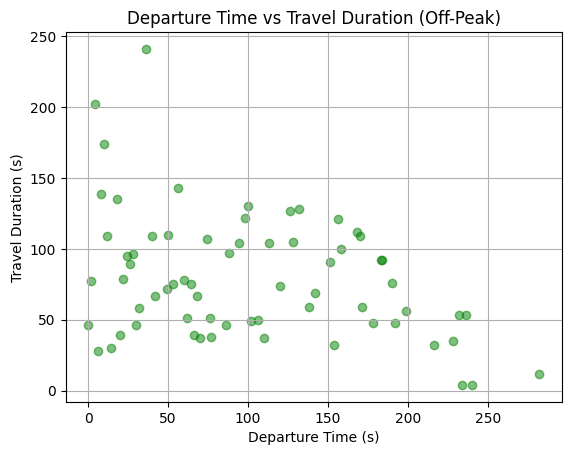

In [119]:
# Example scatter plot of departure time vs travel duration
plt.scatter(trip_info_offpeak['depart'], trip_info_offpeak['duration'], alpha=0.5, color='green')
plt.title('Departure Time vs Travel Duration (Off-Peak)')
plt.xlabel('Departure Time (s)')
plt.ylabel('Travel Duration (s)')
plt.grid(True)
plt.show()


Plotting for Weekend Simulation

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the trip information from the tripinfo.xml file for weekend simulations
trip_info_weekend = pd.read_xml('tripinfo_weekend.xml', xpath='//tripinfo')

# Check the first few rows to understand the data
print(trip_info_weekend.head())


   id  depart    departLane  departPos  departSpeed  departDelay  arrival  \
0   0     0.0  30568275#2_0        5.1          0.0          0.0     47.0   

      arrivalLane  arrivalPos  arrivalSpeed  ...  waitingTime  waitingCount  \
0  -114554802#6_0        9.37          8.25  ...          0.0             0   

   stopTime  timeLoss  rerouteNo                 devices            vType  \
0       0.0      6.05          0  tripinfo_0 emissions_0  DEFAULT_VEHTYPE   

  speedFactor vaporized  emissions  
0        1.06       NaN        NaN  

[1 rows x 22 columns]


In [54]:
# Convert durations and other relevant fields from strings to numeric if necessary
trip_info_weekend['duration'] = pd.to_numeric(trip_info_weekend['duration'], errors='coerce')

In [55]:
# Display basic statistics for duration
print(trip_info_weekend['duration'].describe())

count     1.0
mean     47.0
std       NaN
min      47.0
25%      47.0
50%      47.0
75%      47.0
max      47.0
Name: duration, dtype: float64


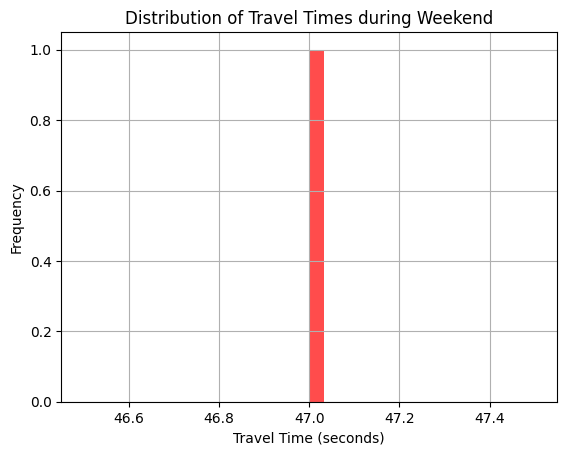

In [116]:
# Plot a histogram of travel times for weekend
trip_info_weekend['duration'].hist(bins=30, color='red', alpha=0.7)
plt.title('Distribution of Travel Times during Weekend')
plt.xlabel('Travel Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Distribution of Route Length

    id  depart  duration  routeLength  waitingTime  timeLoss  speedFactor  \
0    6     1.0      36.0       198.09          0.0      5.87         0.83   
1  240    36.0       4.0        15.15          0.0      2.05         1.13   
2  241    39.0       4.0        15.15          0.0      1.65         0.97   
3  282    29.0      14.0        90.16          0.0      3.06         1.08   
4   72    10.0      37.0       265.52          0.0      3.89         0.97   

        CO2_abs  
0  71408.961609  
1  19134.604248  
2  17446.807294  
3  38003.368461  
4  78588.795098  


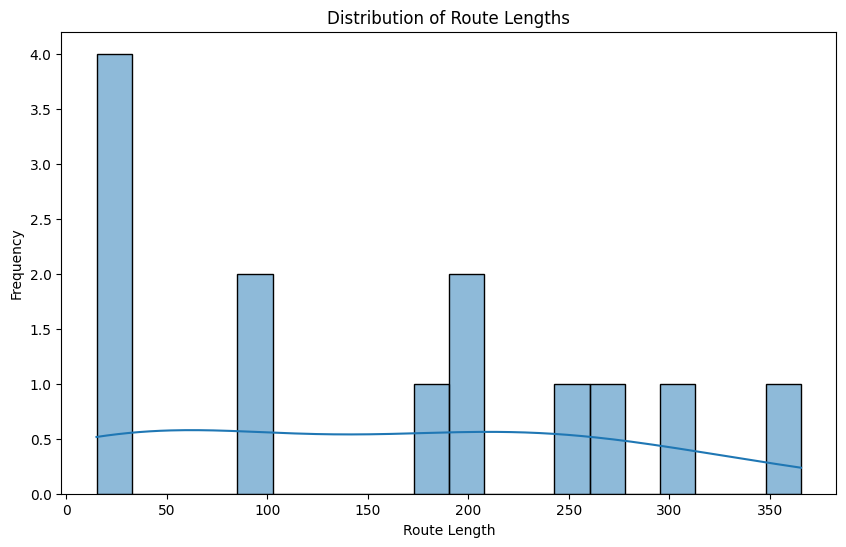

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lxml import etree

# Load XML data
with open('tripinfo_peak.xml', 'r') as file:
    xml_data = file.read()

# Parse XML
tree = etree.fromstring(xml_data.encode())

# Extract data into a DataFrame
data = []
for tripinfo in tree.findall('.//tripinfo'):
    trip = {
        'id': tripinfo.get('id'),
        'depart': float(tripinfo.get('depart')),
        'duration': float(tripinfo.get('duration')),
        'routeLength': float(tripinfo.get('routeLength')),
        'waitingTime': float(tripinfo.get('waitingTime')),
        'timeLoss': float(tripinfo.get('timeLoss')),
        'speedFactor': float(tripinfo.get('speedFactor')),
        'CO2_abs': float(tripinfo.find('.//emissions').get('CO2_abs')),
    }
    data.append(trip)

df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(df['routeLength'], bins=20, kde=True)
plt.title('Distribution of Route Lengths')
plt.xlabel('Route Length')
plt.ylabel('Frequency')
plt.show()

To make the To adapt the Ant Colony Optimization (ACO) algorithm to work with data from your queue_peak.xml which contains metrics like queueing_time, queueing_length, and queueing_length_experimental for various lanes,  you'll need to preprocess this data into a format that represents costs (or weights) in a graph. These costs will represent the "difficulty" or "undesirability" of taking a particular route, based on the queuing statistics.

Preprocessing of queue data is done and then ACO is implemented using cost matrix

Preprocessing of Queue Data

In [114]:
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd

def parse_queue_data(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Initialize an empty list to store data
    data = []

    # Adjusted XPath to correctly target lane elements within the nested structure
    for lane in root.findall('.//lanes/lane'):
        lane_id = lane.get('id')
        queueing_time = float(lane.get('queueing_time'))
        queueing_length = float(lane.get('queueing_length'))
        queueing_length_exp = float(lane.get('queueing_length_experimental'))

        data.append((lane_id, queueing_time, queueing_length, queueing_length_exp))
        print(lane_id, queueing_time, queueing_length, queueing_length_exp)  # Print each row to see the output

    return pd.DataFrame(data, columns=['lane_id', 'queueing_time', 'queueing_length', 'queueing_length_exp'])

# Assuming you have the correct file path
queue_data = parse_queue_data('queue_peak.xml')
print(queue_data.head())

-76333547_0 0.0 0.0 12.59
128171761_0 0.0 0.0 11.88
333061565_0 0.0 0.0 14.55
-114554802#6_0 0.0 0.0 9.27
-42919376#0_0 0.0 0.0 7.96
37293913#3_0 0.0 0.0 16.38
-42919375_0 0.0 0.0 20.82
-76333547_0 0.0 0.0 12.59
128171761_0 0.0 0.0 11.88
333061565_0 0.0 0.0 14.55
-114554802#6_0 0.0 0.0 9.27
-62213052#2_0 0.0 0.0 8.91
234002842#3_1 1.0 24.31 24.31
37293913#3_0 0.0 0.0 16.38
42919374#2_0 0.0 0.0 13.19
-42919374#2_0 0.0 0.0 13.19
42919374#2_0 0.0 0.0 11.81
62212737_0 0.0 0.0 20.15
76333545_0 0.0 0.0 11.43
-29186154#3_0 0.0 0.0 11.25
-42919374#2_0 0.0 0.0 11.81
-62213052#2_0 0.0 0.0 8.91
114555281#0_0 0.0 0.0 18.25
-42919376#0_0 0.0 0.0 7.96
114555281#0_0 0.0 0.0 16.89
324204711#0_0 0.0 0.0 5.0
42919374#2_0 0.0 0.0 13.19
-42919374#2_0 0.0 0.0 13.19
114555281#0_0 0.0 0.0 18.25
42919374#2_0 0.0 0.0 12.0
62212737_0 0.0 0.0 20.15
76333545_0 0.0 0.0 11.43
:6488191715_1_0 0.0 0.0 5.95
-29186154#3_0 0.0 0.0 11.25
-42919374#2_0 0.0 0.0 12.48
-42919376#0_0 0.0 0.0 6.1
-62213052#2_0 0.0 0.0 8.91
-76

Cost Matrix Generation for Queue Data

In [115]:
import numpy as np

# Example where every node is connected to every other node with a default high cost
default_cost = 100  # Arbitrary high cost for lanes that are not the same

for i in range(n_nodes):
    for j in range(n_nodes):
        if i != j:  # Ensure we're not setting the diagonal
            # Set to a default cost or some function of the existing costs
            cost_matrix[i, j] = default_cost - min(cost_matrix[i, i], cost_matrix[j, j]) * 0.1
            # This formula decreases the cost between nodes if their own queue lengths are lower, as a simplistic heuristic

print( "Cost Matrix:\n", cost_matrix)


Cost Matrix:
 [[    inf    -inf    -inf ... 2624.72 2624.72 2624.72]
 [   -inf     inf    -inf ... 2624.72 2624.72 2624.72]
 [   -inf    -inf     inf ... 2624.72 2624.72 2624.72]
 ...
 [2624.72 2624.72 2624.72 ...     inf 2624.72 2624.72]
 [2624.72 2624.72 2624.72 ... 2624.72     inf 2624.72]
 [2624.72 2624.72 2624.72 ... 2624.72 2624.72     inf]]


Normal ACO Algorithm through peak dataset

In [89]:
import numpy as np

def initialize_pheromones(n_nodes, initial_pheromone):
    return np.full((n_nodes, n_nodes), initial_pheromone)

def update_pheromones(pheromone_matrix, paths, decay_rate, contribution):
    pheromone_matrix *= (1 - decay_rate)  # Pheromone evaporation
    for path in paths:
        for i, j in zip(path[:-1], path[1:]):
            pheromone_matrix[i, j] += contribution  # Update pheromone trail
    return pheromone_matrix

def aco(cost_matrix, n_ants, n_iterations, alpha, beta, decay_rate, initial_pheromone, contribution, max_path_length):
    n_nodes = cost_matrix.shape[0]
    pheromone_matrix = initialize_pheromones(n_nodes, initial_pheromone)
    
    best_path = None
    best_cost = float('inf')
    all_path_costs = []  # List to collect all path costs
    
    for iteration in range(n_iterations):
        paths = []
        for ant in range(n_ants):
            path = [np.random.randint(n_nodes)]  # Start from a random node
            while len(path) < max_path_length:
                current = path[-1]
                probabilities = [(pheromone_matrix[current][j] ** alpha) * ((1.0 / cost_matrix[current][j]) ** beta)
                                 for j in range(n_nodes) if j not in path and cost_matrix[current][j] > 0]
                if probabilities:
                    probabilities /= np.sum(probabilities)
                    next_node = np.random.choice([j for j in range(n_nodes) if j not in path and cost_matrix[current][j] > 0], p=probabilities)
                    path.append(next_node)
            paths.append(path)
            
            # Calculate path cost
            path_cost = sum(cost_matrix[path[i], path[i+1]] for i in range(len(path) - 1))
            all_path_costs.append(path_cost)  # Collect each path cost
            if path_cost < best_cost:
                best_cost = path_cost
                best_path = path
                
        pheromone_matrix = update_pheromones(pheromone_matrix, paths, decay_rate, contribution)
    
    return best_path, best_cost, all_path_costs

# Example usage:
best_path, best_cost, all_path_costs = aco(cost_matrix, n_ants=10, n_iterations=100, alpha=1.0, beta=2.0, decay_rate=0.1, initial_pheromone=0.1, contribution=0.5, max_path_length=50)
print("Best Path:", best_path)
print("Best Cost:", best_cost)

Best Path: [80, 227, 283, 66, 166, 186, 217, 297, 215, 354, 298, 126, 40, 342, 332, 10, 52, 181, 96, 348, 12, 58, 31, 85, 43, 2, 276, 142, 184, 199, 188, 226, 310, 271, 4, 272, 202, 289, 0, 20, 194, 79, 8, 7, 218, 190, 295, 119, 307, 210]
Best Cost: 4860.455999999997


Path Visualisation

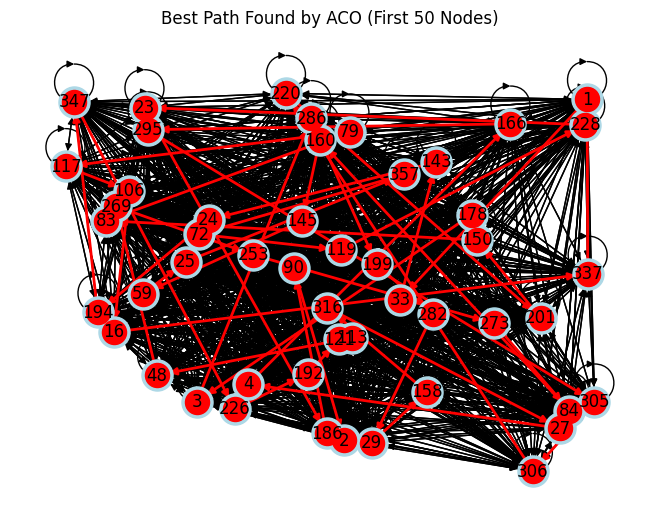

In [85]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'node_positions' is a dictionary of node indices to coordinates (x, y)
# and assuming the best_path can be longer than 50 nodes
max_nodes = 50  # Maximum nodes to display
sub_path = best_path[:max_nodes]  # Taking only the first 50 nodes of the best path

node_positions = {i: (np.random.rand(), np.random.rand()) for i in sub_path}  # Restrict to sub_path nodes

G = nx.DiGraph()
for i in sub_path:
    for j in sub_path:
        if cost_matrix[i, j] != np.inf:
            G.add_edge(i, j, weight=cost_matrix[i, j])

# Draw the network
nx.draw(G, pos=node_positions, node_color='lightblue', with_labels=True, node_size=500)

# Highlight the best path in the network within the sub-path
path_edges = list(zip(sub_path[:-1], sub_path[1:]))
nx.draw_networkx_edges(G, pos=node_positions, edgelist=path_edges, edge_color='red', width=2)
nx.draw_networkx_nodes(G, pos=node_positions, nodelist=sub_path, node_color='red')

plt.title('Best Path Found by ACO (First 50 Nodes)')
plt.show()

Cost Distribution Plot

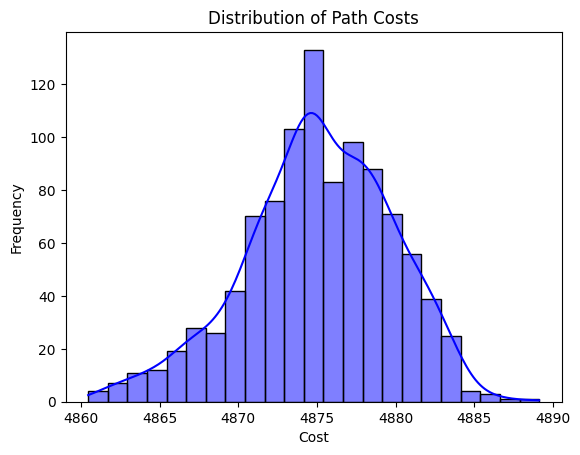

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of path costs
sns.histplot(all_path_costs, kde=True, color='blue')
plt.title('Distribution of Path Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

Parsing of tripinfo.xml

In [167]:
import xml.etree.ElementTree as ET
import pandas as pd

def parse_tripinfo(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Initialize an empty list to store data
    data = []

    # Loop through each 'tripinfo' element in the XML tree
    for tripinfo in root.findall('.//tripinfo'):
        trip_id = tripinfo.get('id')
        depart = float(tripinfo.get('depart'))
        duration = float(tripinfo.get('duration'))
        waiting_time = float(tripinfo.get('waitingTime'))
        time_loss = float(tripinfo.get('timeLoss'))
        route_length = float(tripinfo.get('routeLength'))

        data.append((trip_id, depart, duration, waiting_time, time_loss, route_length))

    # Convert list of tuples into a DataFrame
    columns = ['id', 'depart', 'duration', 'waiting_time', 'time_loss', 'route_length']
    df = pd.DataFrame(data, columns=columns)

    # Optional: Convert duration to numeric in DataFrame if not already
    df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

    return df

# Assuming you have the correct file path
trip_info = parse_tripinfo('tripinfo_peak.xml')
print(trip_info.head())

    id  depart  duration  waiting_time  time_loss  route_length
0    6     1.0      36.0           0.0       5.87        198.09
1  240    36.0       4.0           0.0       2.05         15.15
2  241    39.0       4.0           0.0       1.65         15.15
3  282    29.0      14.0           0.0       3.06         90.16
4   72    10.0      37.0           0.0       3.89        265.52


Cost Matrix Generation for tripinfo_peak.xml

In [160]:
import pandas as pd
import numpy as np

# Assuming trip_info is your DataFrame obtained from parsing the XML file
def generate_cost_matrix(df):
    n = len(df)
    cost_matrix = np.zeros((n, n))  # Initialize a square matrix of zeros

    # Iterate over each pair of trips to compute the cost
    for i in range(n):
        for j in range(n):
            if i != j:  # Assuming the cost from a trip to itself is zero
                # Defining cost as the sum of durations and waiting times
                cost_matrix[i, j] = df.loc[i, 'duration'] + df.loc[j, 'waiting_time']
            else:
                cost_matrix[i, j] = float('inf')  # Optional: infinity cost to self-transition
                
    return cost_matrix

# Generate the cost matrix
cost_matrix = generate_cost_matrix(trip_info)

# Optionally convert the numpy array to a DataFrame for better visualization or handling
cost_matrix_df = pd.DataFrame(cost_matrix, index=trip_info['id'], columns=trip_info['id'])

print(cost_matrix_df)

id       6    240    241    282     72    283     32    402    403      7  \
id                                                                          
6      inf   36.0   36.0   36.0   36.0   36.0   36.0   36.0   36.0   83.0   
240    4.0    inf    4.0    4.0    4.0    4.0    4.0    4.0    4.0   51.0   
241    4.0    4.0    inf    4.0    4.0    4.0    4.0    4.0    4.0   51.0   
282   14.0   14.0   14.0    inf   14.0   14.0   14.0   14.0   14.0   61.0   
72    37.0   37.0   37.0   37.0    inf   37.0   37.0   37.0   37.0   84.0   
283   18.0   18.0   18.0   18.0   18.0    inf   18.0   18.0   18.0   65.0   
32    49.0   49.0   49.0   49.0   49.0   49.0    inf   49.0   49.0   96.0   
402   11.0   11.0   11.0   11.0   11.0   11.0   11.0    inf   11.0   58.0   
403    9.0    9.0    9.0    9.0    9.0    9.0    9.0    9.0    inf   56.0   
7     99.0   99.0   99.0   99.0   99.0   99.0   99.0   99.0   99.0    inf   
30   116.0  116.0  116.0  116.0  116.0  116.0  116.0  116.0  116.0  163.0   

In [169]:
import numpy as np

def generate_cost_matrix(df):
    n = len(df)
    cost_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i != j:
                cost_matrix[i, j] = abs(df.iloc[i]['depart'] - df.iloc[j]['depart']) + df.iloc[j]['duration']
            else:
                cost_matrix[i, j] = np.inf  # Disallow transitions to the same trip

    return cost_matrix

cost_matrix_peak = generate_cost_matrix(trip_info)

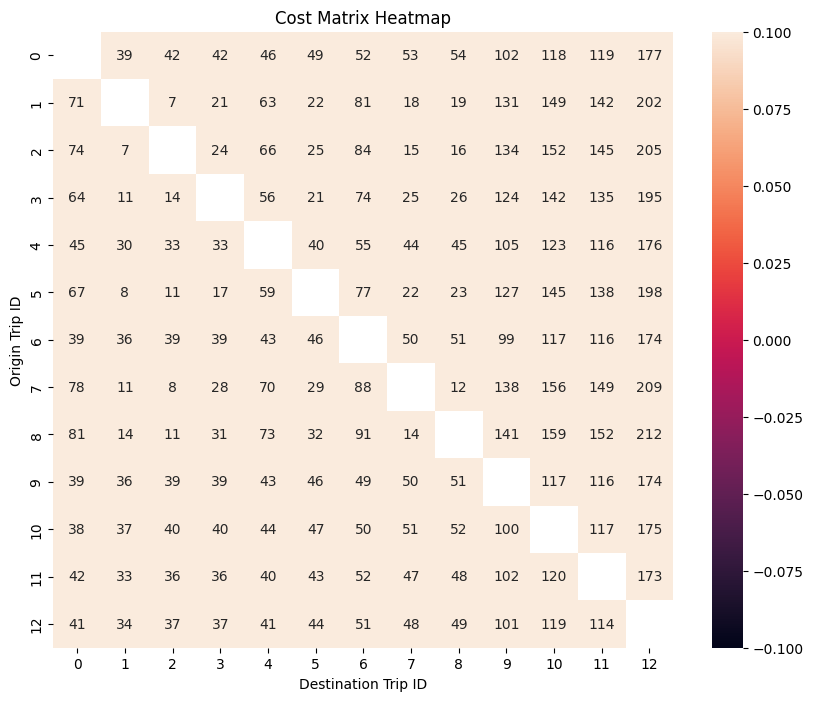

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cost_matrix_df' is your DataFrame containing the cost matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cost_matrix_peak, annot=True, fmt=".0f")
plt.title('Cost Matrix Heatmap')
plt.xlabel('Destination Trip ID')
plt.ylabel('Origin Trip ID')
plt.show()


ACO in peak Traffic Data

In [170]:
import numpy as np

class AntColonyOptimizer:
    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distances = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheromone(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path
            self.pheromone *= self.decay
        return all_time_shortest_path

    def spread_pheromone(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]

    def gen_all_paths(self):
        all_paths = []
        for _ in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for _ in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
        path.append((prev, start))  # return to start
        return path

    def gen_path_dist(self, path):
        total_dist = 0
        for (src, dest) in path:
            total_dist += self.distances[src][dest]
        return total_dist

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0
        if dist[dist == 0].any():
            dist = np.where(dist == 0, np.inf, dist)
        row = pheromone ** self.alpha * ((1.0 / dist) ** self.beta)
        norm_row = row / row.sum()
        move = np.random.choice(self.all_inds, 1, p=norm_row)[0]
        return move

# Example usage
aco = AntColonyOptimizer(distances=cost_matrix_peak, n_ants=10, n_best=3, n_iterations=100, decay=0.95, alpha=1, beta=2)
best_path = aco.run()
print("Best path found:", best_path)

Best path found: ([(0, 2), (2, 1), (1, 2), (2, 1), (1, 2), (2, 1), (1, 2), (2, 1), (1, 2), (2, 1), (1, 2), (2, 1), (1, 0)], 190.0)


Q_Learning Algorithm

In [152]:
import numpy as np
import pandas as pd

class QLearningOptimizer:
    def __init__(self, cost_matrix, alpha=0.1, gamma=0.6, epsilon=0.1, episodes=1000):
        """
        Initialize Q-learning optimizer.
        :param cost_matrix: DataFrame with costs between each pair of nodes.
        :param alpha: Learning rate.
        :param gamma: Discount factor.
        :param epsilon: Exploration rate for the epsilon-greedy policy.
        :param episodes: Number of training episodes.
        """
        self.cost_matrix = cost_matrix
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes
        self.n_states = cost_matrix.shape[0]
        self.q_table = np.zeros((self.n_states, self.n_states))

    def train(self):
        for _ in range(self.episodes):
            state = np.random.randint(0, self.n_states)
            while True:
                if np.random.uniform(0, 1) < self.epsilon:
                    action = np.random.randint(0, self.n_states)
                else:
                    action = np.argmin(self.q_table[state])

                cost = self.cost_matrix.iloc[state, action]
                reward = -cost  # Reward is the negative of cost

                old_value = self.q_table[state, action]
                next_min = np.min(self.q_table[action])
                self.q_table[state, action] = (1 - self.alpha) * old_value + \
                                              self.alpha * (reward + self.gamma * next_min)

                if state == action:
                    break
                state = action

    def get_optimal_path(self, start):
        path = [start]
        current_state = start
        while True:
            next_state = np.argmin(self.q_table[current_state])
            if next_state == current_state or next_state in path:
                break
            path.append(next_state)
            current_state = next_state
        return path

# Example Usage:
# Assuming cost_matrix_df is a DataFrame where indices and columns are trip IDs and the values are costs
optimizer = QLearningOptimizer(cost_matrix_df)
optimizer.train()
optimal_path = optimizer.get_optimal_path(start=0)  # Starting from node 0
print("Optimal path:", optimal_path)


Optimal path: [0]


For Q_Learning ACO

In [148]:
import numpy as np
import pandas as pd
import random

# Constants
NUMBER_OF_INTERSECTIONS = 5  # Example number of intersections
ACTIONS = [0, 1, 2]  # Example actions: 0 = no change, 1 = change to green, 2 = change to red
ALPHA = 1.0  # Influence of pheromone
BETA = 1.0  # Influence of heuristic information
DECAY = 0.1  # Pheromone decay factor
Q_INIT_VALUE = 0.01  # Initial value for all Q-table entries
simulation_time = 500  # Simulation time in seconds

class Environment:
    def __init__(self, intersections):
        self.intersections = intersections
        # Initialize pheromone levels: assume three actions per intersection
        self.pheromone_levels = np.ones((intersections, len(ACTIONS)))
        
class Ant:
    def __init__(self, environment, trip_data):
        self.env = environment
        self.trip_data = trip_data  # Trip data for the ant
        self.current_intersection = 0
        self.path_taken = []
        self.current_time = 0

    def select_intersection(self):
        # Calculate probabilities of choosing each action based on pheromone levels
        probabilities = []
        total = sum(self.env.pheromone_levels[self.current_intersection] ** ALPHA)
        for action in ACTIONS:
            prob = (self.env.pheromone_levels[self.current_intersection][action] ** ALPHA) / total
            probabilities.append(prob)
        next_action = np.random.choice(ACTIONS, p=probabilities)
        return next_action

    def move(self):
        action = self.select_intersection()
        self.path_taken.append((self.current_intersection, action))
        self.current_time += self.trip_data['duration']  # Use duration from trip data
        self.current_intersection = (self.current_intersection + 1) % self.env.intersections

    def reset(self):
        self.current_intersection = 0
        self.path_taken = []
        self.current_time = 0

def update_pheromones(ants, environment, decay_factor, reward_function):
    environment.pheromone_levels *= (1 - decay_factor)  # Apply decay to all pheromones
    for ant in ants:
        for intersection, action in ant.path_taken:
            reward = reward_function(intersection, action)
            environment.pheromone_levels[intersection][action] += reward

def reward_function(intersection, action):
    return 1.0 / (1 + env.pheromone_levels[intersection][action])  # Simplified reward function

def simulate(epochs, ants, environment):
    for epoch in range(epochs):
        for ant in ants:
            ant.reset()  # Reset each ant for a new cycle
            while ant.current_time < simulation_time:
                ant.move()  # Move each ant based on its trip data
        update_pheromones(ants, environment, DECAY, reward_function)  # Update pheromones
        # Print pheromone levels for debugging
        print(f"After epoch {epoch + 1}, pheromone levels:")
        for i in range(environment.intersections):
            print(f"Intersection {i}: {environment.pheromone_levels[i]}")

# Initialize environment and ants
env = Environment(NUMBER_OF_INTERSECTIONS)
trip_info = pd.DataFrame({
    'duration': np.random.randint(1, 60, size=10)  # Random durations for example
})
ants = [Ant(env, trip_info.iloc[i]) for i in range(len(trip_info))]

# Run simulation
simulate(10, ants, env)

After epoch 1, pheromone levels:
Intersection 0: [6.1419451  4.90034568 6.41928859]
Intersection 1: [6.28196298 5.55134526 5.23457661]
Intersection 2: [5.70398567 5.70398567 5.55134526]
Intersection 3: [4.35875296 5.39497242 6.5540724 ]
Intersection 4: [6.1419451  4.72569437 5.39497242]
After epoch 2, pheromone levels:
Intersection 0: [8.43306891 6.97901537 8.60646788]
Intersection 1: [8.41395172 7.62097826 7.42674898]
Intersection 2: [7.83113193 8.16659185 7.26308443]
Intersection 3: [6.39237219 6.91143998 9.0982898 ]
Intersection 4: [7.53711683 6.20525175 8.52775082]
After epoch 3, pheromone levels:
Intersection 0: [ 9.5827137   8.44865849 10.34685372]
Intersection 1: [9.47330525 9.29727854 8.96527406]
Intersection 2: [9.2476202  9.19422067 9.05450991]
Intersection 3: [ 6.98586784  7.85087113 11.35821668]
Intersection 4: [10.08771185  7.22086653  8.96971052]
After epoch 4, pheromone levels:
Intersection 0: [10.78274694  9.68847091 11.10378696]
Intersection 1: [10.35432045 10.91607062

Q Learning Algorithm

   time vehicle_id      CO2      CO   NOx   PMx  speed
0  0.00          0  2624.72  164.78  1.20  0.07   0.00
1  1.00          0  3831.58  150.00  1.71  0.08   2.38
2  1.00         10  2624.72  164.78  1.20  0.07   0.00
3  1.00          2  2624.72  164.78  1.20  0.07   0.00
4  1.00          4  2624.72  164.78  1.20  0.07   0.00


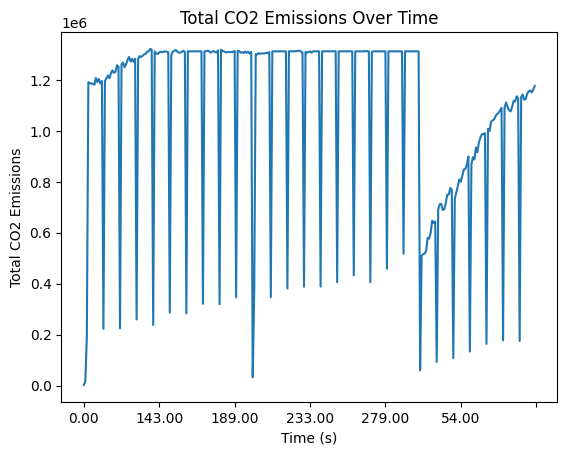

In [100]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

def parse_emissions(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    data = []
    for timestep in root.findall('timestep'):
        time = timestep.get('time')
        for vehicle in timestep.findall('vehicle'):
            data.append({
                'time': time,
                'vehicle_id': vehicle.get('id'),
                'CO2': float(vehicle.get('CO2')),
                'CO': float(vehicle.get('CO')),
                'NOx': float(vehicle.get('NOx')),
                'PMx': float(vehicle.get('PMx')),
                'speed': float(vehicle.get('speed'))
            })

    return pd.DataFrame(data)

# Load and analyze the data
emissions_df = parse_emissions('emission_peak.xml')
print(emissions_df.head())

# Example plot: Total CO2 emissions over time
emissions_df.groupby('time')['CO2'].sum().plot()
plt.title('Total CO2 Emissions Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Total CO2 Emissions')
plt.show()

Parse trip_info_offpeak.xml

In [154]:
import xml.etree.ElementTree as ET
import pandas as pd

def parse_tripinfo(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Initialize an empty list to store data
    data = []

    # Loop through each 'tripinfo' element in the XML tree
    for tripinfo in root.findall('.//tripinfo'):
        trip_id = tripinfo.get('id')
        depart = float(tripinfo.get('depart'))
        duration = float(tripinfo.get('duration'))
        waiting_time = float(tripinfo.get('waitingTime'))
        time_loss = float(tripinfo.get('timeLoss'))
        route_length = float(tripinfo.get('routeLength'))

        data.append((trip_id, depart, duration, waiting_time, time_loss, route_length))

    # Convert list of tuples into a DataFrame
    columns = ['id', 'depart', 'duration', 'waiting_time', 'time_loss', 'route_length']
    df = pd.DataFrame(data, columns=columns)

    # Optional: Convert duration to numeric in DataFrame if not already
    df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

    return df

# Assuming you have the correct file path
trip_info_offpeak = parse_tripinfo('tripinfo_offpeak.xml')
print(trip_info_offpeak.head())

   id  depart  duration  waiting_time  time_loss  route_length
0   3     6.0      28.0           0.0       5.31        198.09
1   7    14.0      30.0           0.0       4.28        185.48
2   0     0.0      46.0           0.0       5.66        352.86
3  10    20.0      39.0           0.0       7.05        274.27
4  15    30.0      46.0           0.0       6.27        296.57


In [156]:
import pandas as pd
import numpy as np

# Assuming trip_info_offpeak is your DataFrame obtained from parsing the XML file
def generate_cost_matrix(df):
    n = len(df)
    cost_matrix = np.zeros((n, n))  # Initialize a square matrix of zeros

    # Iterate over each pair of trips to compute the cost
    for i in range(n):
        for j in range(n):
            if i != j:  # Assuming the cost from a trip to itself is zero
                # Defining cost as the sum of durations and waiting times
                cost_matrix[i, j] = df.loc[i, 'duration'] + df.loc[j, 'waiting_time']
            else:
                cost_matrix[i, j] = float('inf')  # Optional: infinity cost to self-transition
                
    return cost_matrix

# Generate the cost matrix
cost_matrix = generate_cost_matrix(trip_info_offpeak)

# Optionally convert the numpy array to a DataFrame for better visualization or handling
cost_matrix_offpeak_df = pd.DataFrame(cost_matrix, index=trip_info_offpeak['id'], columns=trip_info_offpeak['id'])

print(cost_matrix_offpeak_df)

id       3      7      0     10     15      1     16     11     33     35  \
id                                                                          
3      inf   28.0   28.0   28.0   28.0   33.0   28.0   40.0   28.0   28.0   
7     30.0    inf   30.0   30.0   30.0   35.0   30.0   42.0   30.0   30.0   
0     46.0   46.0    inf   46.0   46.0   51.0   46.0   58.0   46.0   46.0   
10    39.0   39.0   39.0    inf   39.0   44.0   39.0   51.0   39.0   39.0   
15    46.0   46.0   46.0   46.0    inf   51.0   46.0   58.0   46.0   46.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
85   109.0  109.0  109.0  109.0  109.0  114.0  109.0  121.0  109.0  109.0   
82   112.0  112.0  112.0  112.0  112.0  117.0  112.0  124.0  112.0  112.0   
116   53.0   53.0   53.0   53.0   53.0   58.0   53.0   65.0   53.0   53.0   
118   53.0   53.0   53.0   53.0   53.0   58.0   53.0   65.0   53.0   53.0   
141   12.0   12.0   12.0   12.0   12.0   17.0   12.0   24.0   12.0   12.0   

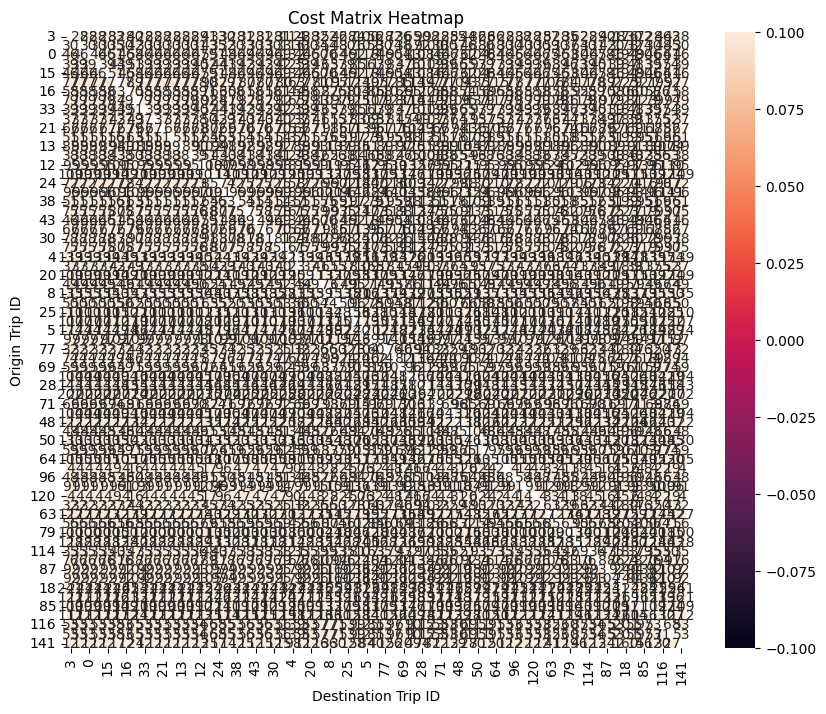

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cost_matrix_df' is your DataFrame containing the cost matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cost_matrix_offpeak_df, annot=True, fmt=".0f")
plt.title('Cost Matrix Heatmap for off peak')
plt.xlabel('Destination Trip ID')
plt.ylabel('Origin Trip ID')
plt.show()


In [ ]:
import numpy as np

class AntColonyOptimizer:
    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distances = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheromone(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path
            self.pheromone *= self.decay
        return all_time_shortest_path

    def spread_pheromone(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]

    def gen_all_paths(self):
        all_paths = []
        for _ in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for _ in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
        path.append((prev, start))  # return to start
        return path

    def gen_path_dist(self, path):
        total_dist = 0
        for (src, dest) in path:
            total_dist += self.distances[src][dest]
        return total_dist

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0
        if dist[dist == 0].any():
            dist = np.where(dist == 0, np.inf, dist)
        row = pheromone ** self.alpha * ((1.0 / dist) ** self.beta)
        norm_row = row / row.sum()
        move = np.random.choice(self.all_inds, 1, p=norm_row)[0]
        return move

# Example usage
distances = np.array([[np.inf, 2, 3], [2, np.inf, 1], [3, 1, np.inf]])
aco = AntColonyOptimizer(distances, n_ants=10, n_best=3, n_iterations=100, decay=0.95, alpha=1, beta=2)
best_path = aco.run()
print("Best path found:", best_path)